# Лабораторная работа № 1
### Минимальная оценка - 3 балла
### Максимальная оценка - 5 балла
Целью данной работы является изучение метода градиентного спуска для минимизации эмпирического риска функции потерь линейной регресии.
Для успешной сдачи лабораторной работы Вам необходимо предоставить заполненый исходный ноутбук.

In [1]:
import numpy as np
from numpy.testing import assert_array_almost_equal

## Описание датасета

### Вариант 1:
Известно,что с увеличением высоты над уровнем моря температура кипения воды понижается/
<br>Файл X: массив данных, содержащий информацию об атмосферном давлении.
<br>Файл Y: массив данных, содержащий информацию о температуре кипения воды при соответствующем значении атомсферном давлении.

### Вариант 2:
Каждый пользователь Почты имеет так называемую карму. Карма - это число от 0 до 1000, которое характеризует, насколько пользователь похож на спамера. Чем число больше, тем лучше - это означает, что пользователь не рассылает спам. Чем число меньше, тем хуже - пользователь был замечен в рассылке нежелательного контента.
<br>Файл X_karma_features: массив данных, содержащий информацию о карме пользователя.
<br>Файл Y_bantime_target: массив данных, содержащий соответствующее время жизни ящика, измеренное в часах.

P.S.: Напоминаю, что вариант считается по формуле $(N\%2)+1$, где $N$ Ваш номер в списке группы

In [2]:
N = 10
V = (N % 2) + 1
V

1

In [3]:
X = np.load('X').reshape((-1, 1))
X.shape, X

((125, 1),
 array([[-305.],
        [-229.],
        [-152.],
        [ -76.],
        [   0.],
        [  76.],
        [ 152.],
        [ 229.],
        [ 305.],
        [ 381.],
        [ 457.],
        [ 533.],
        [ 610.],
        [ 686.],
        [ 762.],
        [ 838.],
        [ 914.],
        [ 991.],
        [1067.],
        [1143.],
        [1219.],
        [1295.],
        [1372.],
        [1448.],
        [1524.],
        [1600.],
        [1676.],
        [1753.],
        [1829.],
        [1905.],
        [1981.],
        [2057.],
        [2134.],
        [2210.],
        [2286.],
        [2362.],
        [2438.],
        [2515.],
        [2591.],
        [2667.],
        [2743.],
        [2819.],
        [2896.],
        [2972.],
        [3048.],
        [3124.],
        [3200.],
        [3277.],
        [3353.],
        [3429.],
        [3505.],
        [3581.],
        [3658.],
        [3734.],
        [3810.],
        [3886.],
        [3962.],
        [4037.],
   

In [4]:
# Вообще в линейной модели есть еще и смещение,
# поэтому добавлю столбец единичек справа
# Они будут домножаться на смещение как раз
X = np.hstack([X, np.ones((X.shape[0], 1))])
n_feat = X.shape[1]
X, n_feat

(array([[-3.050e+02,  1.000e+00],
        [-2.290e+02,  1.000e+00],
        [-1.520e+02,  1.000e+00],
        [-7.600e+01,  1.000e+00],
        [ 0.000e+00,  1.000e+00],
        [ 7.600e+01,  1.000e+00],
        [ 1.520e+02,  1.000e+00],
        [ 2.290e+02,  1.000e+00],
        [ 3.050e+02,  1.000e+00],
        [ 3.810e+02,  1.000e+00],
        [ 4.570e+02,  1.000e+00],
        [ 5.330e+02,  1.000e+00],
        [ 6.100e+02,  1.000e+00],
        [ 6.860e+02,  1.000e+00],
        [ 7.620e+02,  1.000e+00],
        [ 8.380e+02,  1.000e+00],
        [ 9.140e+02,  1.000e+00],
        [ 9.910e+02,  1.000e+00],
        [ 1.067e+03,  1.000e+00],
        [ 1.143e+03,  1.000e+00],
        [ 1.219e+03,  1.000e+00],
        [ 1.295e+03,  1.000e+00],
        [ 1.372e+03,  1.000e+00],
        [ 1.448e+03,  1.000e+00],
        [ 1.524e+03,  1.000e+00],
        [ 1.600e+03,  1.000e+00],
        [ 1.676e+03,  1.000e+00],
        [ 1.753e+03,  1.000e+00],
        [ 1.829e+03,  1.000e+00],
        [ 1.90

In [5]:
y = np.load('Y').reshape((-1, 1))
y.shape, y

((125, 1),
 array([[101.1],
        [100.8],
        [100.5],
        [100.3],
        [100. ],
        [ 99.7],
        [ 99.5],
        [ 99.2],
        [ 98.9],
        [ 98.6],
        [ 98.4],
        [ 98.1],
        [ 97.8],
        [ 97.6],
        [ 97.3],
        [ 97.1],
        [ 96.8],
        [ 96.5],
        [ 96.3],
        [ 96. ],
        [ 95.7],
        [ 95.5],
        [ 95.2],
        [ 94.9],
        [ 94.7],
        [ 94.4],
        [ 94.2],
        [ 93.9],
        [ 93.6],
        [ 93.4],
        [ 93.1],
        [ 92.9],
        [ 92.6],
        [ 92.4],
        [ 92.1],
        [ 91.8],
        [ 91.6],
        [ 91.3],
        [ 91.1],
        [ 90.8],
        [ 90.6],
        [ 90.3],
        [ 90.1],
        [ 89.8],
        [ 89.6],
        [ 89.3],
        [ 89.1],
        [ 88.8],
        [ 88.6],
        [ 88.3],
        [ 88.1],
        [ 87.8],
        [ 87.6],
        [ 87.3],
        [ 87.1],
        [ 86.8],
        [ 86.6],
        [ 86.4],
   

## Задание 1 (3 балла)
#### Реализовать модель линейной регрессии и минимизировать её эмпирический риск
Модель линейной регрессии задаётся формулой: $$\vec{y}=X\vec{w}+\mathbb{C}$$
где $\vec{y}$ - вектор целевой переменной, $X$ - матрица признаков, $\vec{w}$ - вектор весов, $\mathbb{C}$ - ошибка модели.
<br>По сути линейная регрессия просто складывает все признаки с определённым весом.
(Более подробно про линейную регрессию можно почитать [тут](http://www.machinelearning.ru/wiki/index.php?title=Линейная_регрессия))

## Задание 1.1
Реализуйте функцию подсчёта эмпирического риска, представленного формулой:
$$\frac{\sum_{i=0}^{n}(\tilde{x_i}-x_i)^{2}}{n}$$
на вход которой подаются массивы с реальными и предсказанными значениями.

In [6]:
def my_loss_function(predicted_values: np.ndarray, true_values: np.ndarray):
    assert predicted_values.size == true_values.size
    
    #
    # Тут все прямо по формулке -- сумма квадратов разностей
    #
    
    n = predicted_values.size
    return np.sum((predicted_values - true_values) ** 2) / n

Проверьте вашу функцию, используя следующий код (он должен выполняться без ошибок):

In [7]:
assert_array_almost_equal(my_loss_function(np.array([1,0,1,0]),
                                           np.array([0,1,1,0])),
                          0.5)

## Задание 1.2
Реализуйте (на свой выбор) функцию инициализации весов (см. лекции) и выведите результат для $length=N$

In [8]:
from scipy.stats import uniform

In [9]:
def initial_weights(length):
    #
    # По лекциям только инициализация Ксавье была. Посмотрим на модель как на
    # сеть с 1 входом и одним выходом, тогда с учетом вида распределения
    # для линейной функции активации получится такое распределение U[-sqrt(3), sqrt(3)]
    #
    
    r = np.sqrt(3)  # sqrt(6 / (n_in + n_out)), n_in = n_out = 1
    return uniform.rvs(size=length, loc=-r, scale=2*r).reshape((length,1))

In [10]:
initial_weights(N)

array([[-0.23982613],
       [ 0.34642631],
       [-1.62715249],
       [-0.76535407],
       [ 1.23108138],
       [ 0.71611094],
       [-0.08464574],
       [-0.21204095],
       [ 1.38971846],
       [ 0.31369682]])

## Задание 1.3
Реализуйте свою модель линейной регрессии, на вход которой подаётся матрица объект-признак (файл X/X_karma_features) и вектор весов.
<br>На выходе возвращается предсказанная целевая переменная (см. формулу в задании 1)

In [13]:
def my_model(features, weights):
    print(features.shape, weights.shape)
    return features.dot(weights)

In [14]:
my_model(X, initial_weights(2))

(125, 2) (2, 1)


array([[ 2.21302718e+02],
       [ 1.66417794e+02],
       [ 1.10810699e+02],
       [ 5.59257753e+01],
       [ 1.04085106e+00],
       [-5.38440732e+01],
       [-1.08728997e+02],
       [-1.64336092e+02],
       [-2.19221016e+02],
       [-2.74105940e+02],
       [-3.28990864e+02],
       [-3.83875788e+02],
       [-4.39482883e+02],
       [-4.94367807e+02],
       [-5.49252731e+02],
       [-6.04137655e+02],
       [-6.59022580e+02],
       [-7.14629674e+02],
       [-7.69514598e+02],
       [-8.24399522e+02],
       [-8.79284446e+02],
       [-9.34169371e+02],
       [-9.89776465e+02],
       [-1.04466139e+03],
       [-1.09954631e+03],
       [-1.15443124e+03],
       [-1.20931616e+03],
       [-1.26492326e+03],
       [-1.31980818e+03],
       [-1.37469310e+03],
       [-1.42957803e+03],
       [-1.48446295e+03],
       [-1.54007005e+03],
       [-1.59495497e+03],
       [-1.64983990e+03],
       [-1.70472482e+03],
       [-1.75960974e+03],
       [-1.81521684e+03],
       [-1.8

## Задание 1.4
Реализуйте метод градиентного спуска. Для этого:
1. Реализуйте функцию вычисляющую градиент в точке (для функции подсчёта эмпирического риска)
2. Реализуйте функцию обновляющую веса линейно регрессии в соответствии с направлением градиента (см. лекции)
3. Объедините полученные функции в одну
4. Для упрощения, обновите веса $iter\_num$ раз ($iter\_num=N*(k\%50)$, где $N$ - ваш номер в списке группы, $k$ - номер вашей группы).

Сам градиентный спуск:
$$
w_{t+1} = w_{t} - l \cdot \nabla L(X, w)
$$

In [12]:
def grad_of_my_loss_func(X, y, weights):
    n = X.shape[0]
    return 2 * X.T.dot(my_model(X, weights) - y) / n

In [13]:
def update_weigths(grad, weights, learning_rate):
    return weights - learning_rate * grad

In [14]:
def grad_descent(X, y, initial_weights, iter_num, learning_rate=0.1):
    weights = initial_weights
    
    history = []
    for _ in range(iter_num):
        history.append(weights)
        weights = update_weigths(grad_of_my_loss_func(X, y, weights), 
                                 weights, 
                                 learning_rate)
    
    return weights, history

## Задание 1.5
1. Разделите свою выборку на обучающую и тестовую
2. Сгенерируйте веса
2. Используя свой метод градиентного спуска и свою модель линейной регрессии, подберите оптимальные веса для обучающей выборки
3. Используя полученные на шаге 3 веса сделайте предсказание для тестовой выборки
4. Выведите значение функции потерь при изначально сгенерированных весах и при весах, полученных в результате градиентного спуска

In [24]:
iter_num = (N * (507 % 50))

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [18]:
learning_rate = 1e-8

### Попытка неудачная

In [19]:
weights = initial_weights(n_feat)
weights

array([[-0.12707283],
       [-0.21674199]])

In [20]:
weights, history = grad_descent(X_train, y_train, weights, iter_num, learning_rate)
weights

array([[ 0.0133322 ],
       [-0.21667878]])

## Задание 1.6
Графически сравните предсказание модели с тестовой выборкой. И сделайте вывод об качестве модели.

P.S.: если графики расходятся, то к исходной выборке добавьте столбец из единичек и повторите все последующие действия

In [11]:
%matplotlib inline
import matplotlib.pyplot as plt

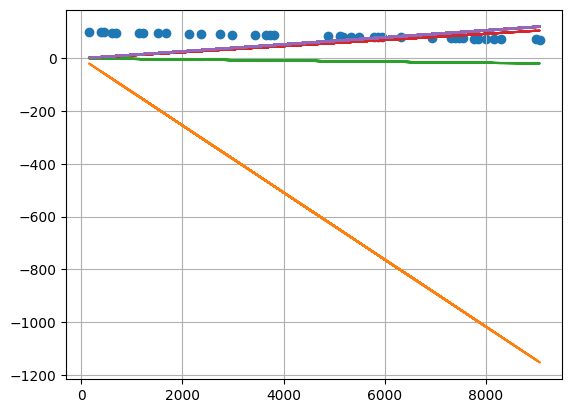

In [22]:
plt.scatter(X_test[:, 0], y_test)
plt.plot(X_test[:, 0], my_model(X_test, weights))

for i in range(0, len(history), 3):
    plt.plot(X_test[:, 0], my_model(X_test, history[i]))
    
plt.grid()

Тут как получается, мы не доходим до минимума, так как попадаем на плато и еле тащимся по нему в сторону минимума. 

Собственно это можно наблюдать на первом рисунке ниже. Лосс у нас представляет из себя так вообще параболический цилиндр (даже не параболоид). Это можно заметить, если понять, что наш лосс выражается как $(w[0] \cdot k_0 + w[1] \cdot k_1) ^ 2$ для каких-то $k_0, k_1$ ($k_0 \ne 0$). Минимум достигается на линии $w[0] = -\frac{w[1] \cdot k_1}{k_0}$.

Оказавшись около дна цилиндра, продвижение там будет очень медленным. Это усугубляется еще и тем, что цилиндр на самом деле очень узкий в нашем случае получается.

Также если посмотреть на два рисунка еще ниже, будет ясно, что к начальному положению (левый рисунок) ближайшим "субоптимальным" является именно то, в которое пришли (правый рисунок), а вот то, истинное оптимальное находится еще очень далеко, и при этом лосс у нас будет уменьшаться очень и очень слабо. 

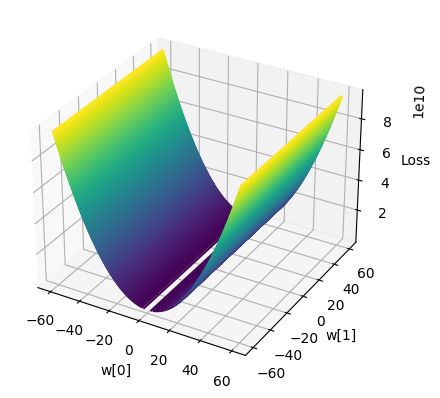

In [41]:
def f(x, y):
    result = []
    for xr, yr in zip(x, y):
        result.append([
            my_loss_function(my_model(X_train, np.array([[xv], [yv]])), y_train) 
            for xv, yv in zip(xr, yr)
        ])
    return np.array(result)

xs = np.linspace(-60, 60, 50)
ys = np.linspace(-60, 60, 50)

Xs, Ys = np.meshgrid(xs, ys)
Zs = f(Xs, Ys)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(Xs, Ys, Zs, 500)
ax.set_xlabel('w[0]')
ax.set_ylabel('w[1]')
ax.set_zlabel('Loss');

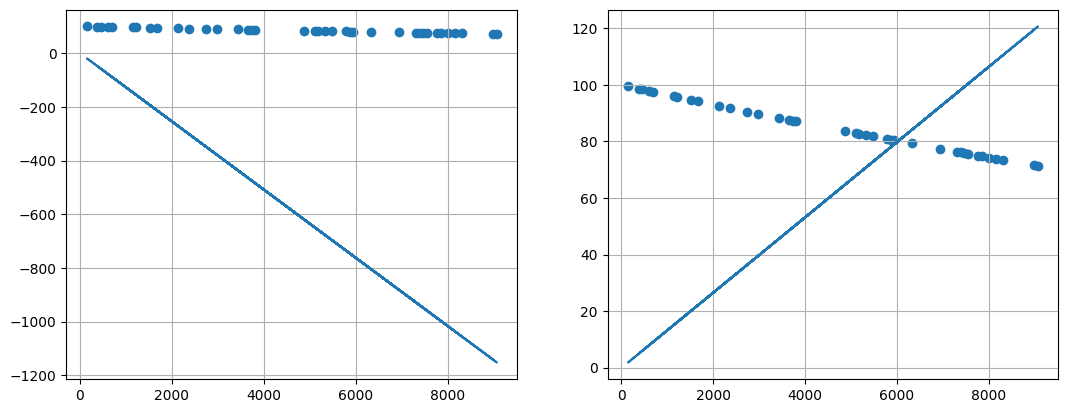

In [23]:
_, ax = plt.subplots(1, 2, figsize=[12.8, 4.8])

ax[0].scatter(X_test[:, 0], y_test)
ax[0].plot(X_test[:, 0], my_model(X_test, history[0]))
ax[0].grid()

ax[1].scatter(X_test[:, 0], y_test)
ax[1].plot(X_test[:, 0], my_model(X_test, weights))
ax[1].grid()

### Более удачная попытка
Инициализируем веса так, чтобы они были ближе все-таки к минимуму лосса. В частности, зададим смещение равным 100 (на графике с данными можно подглядеть, что оно примерно 100 должно равняться).

In [24]:
weights = initial_weights(n_feat)
weights[1] = 100

In [25]:
weights, history = grad_descent(X_train, y_train, weights, iter_num, learning_rate)
weights

array([[-3.25967554e-03],
       [ 9.99997635e+01]])

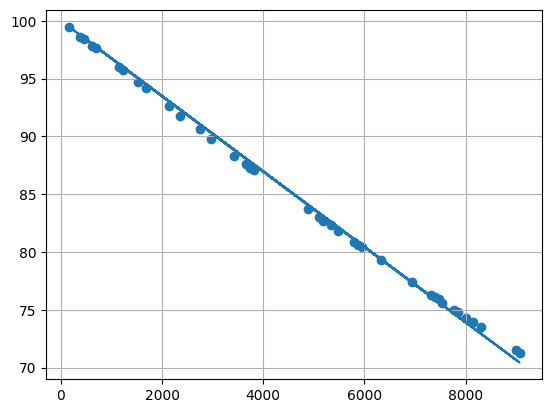

In [26]:
plt.scatter(X_test[:, 0], y_test)
plt.plot(X_test[:, 0], my_model(X_test, weights))
plt.grid()

Другое дело :)

## Задание 2 (2 балла)
Реализуйте метод градиентного спуска, в котором остановка осуществляется не при достижении параметра $iter\_num$, а [другим способом](http://www.machinelearning.ru/wiki/index.php?title=Метод_градиентного_спуска).

In [27]:
def grad_descent_advanced(X, y, initial_weights, iter_num, learning_rate=0.1, epsilon=1e-4):
    weights = initial_weights
    
    prev_loss = my_loss_function(my_model(X, weights), y)
    weights = update_weigths(grad_of_my_loss_func(X, y, weights), 
                             weights, 
                             learning_rate)
    
    for i in range(iter_num - 1):
        loss = my_loss_function(my_model(X, weights), y)
        
        if np.linalg.norm(loss - prev_loss) < epsilon:
            print(f'Early stopping at iter {i + 2}: {prev_loss = }, {loss = }')
            break
            
        weights = update_weigths(grad_of_my_loss_func(X, y, weights), 
                                 weights, 
                                 learning_rate)
        prev_loss = loss
    
    return weights

In [28]:
weights = initial_weights(n_feat)
weights[1] = 100
weights

array([[ -0.70320853],
       [100.        ]])

In [29]:
weights = grad_descent_advanced(X_train, y_train, weights, iter_num, learning_rate)
weights

Early stopping at iter 20: prev_loss = 0.1625892882065176, loss = 0.16255824980990416


array([[-3.26032999e-03],
       [ 1.00000116e+02]])

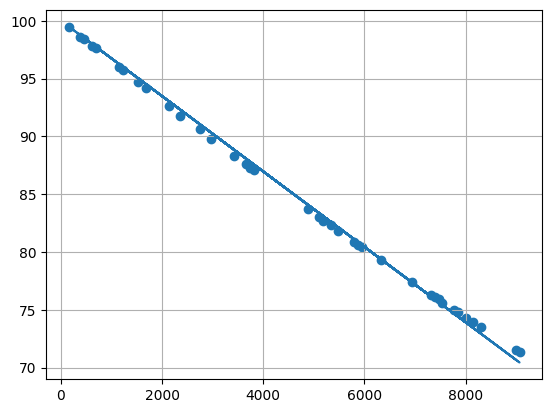

In [30]:
plt.scatter(X_test[:, 0], y_test)
plt.plot(X_test[:, 0], my_model(X_test, weights))
plt.grid()

Собственно, раньше тоже можно останавливаться. Будет хорошо.